# Screen conversion
converting a broken asus displayport full hd screen to HDMI with a new housing made of wood.


In [1]:
%command xvfb-run openscad

The display command is 'xvfb-run openscad'

## HDMI display Board approximation for subtraction from housings

Compiling design (CSG Products normalization)...
Normalized CSG tree has 11 elements


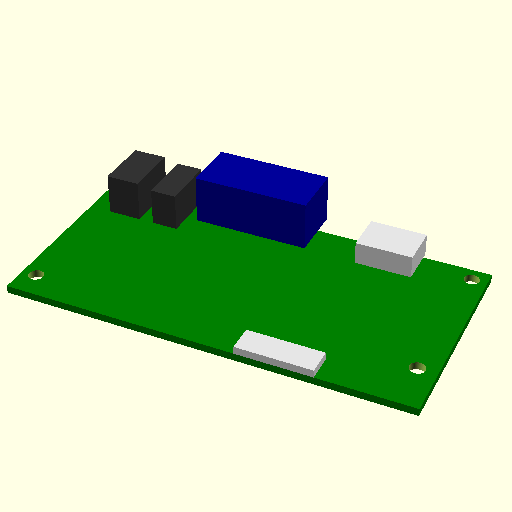

In [2]:
//hdmi display board
module hdmiBoard(ext) {
    boardThick=2;
    boardWidth=107;
    boardDepth=55;
    holeRad=2;
    Extrude=ext; //extrude the ports or set to 0 for real board
    difference(){
        $fn=100;
        union(){
            color([0,.5,0]) cube([boardWidth,boardDepth,boardThick]);
            color([.2,.2,.2]) translate([6,boardDepth-15,boardThick]) cube([9,15+Extrude,11]); //power
            color([.2,.2,.2]) translate([19,boardDepth-15,boardThick]) cube([7,15+Extrude,10]); //audio
            color([0,0,0.6]) translate([29,boardDepth-9,boardThick]) cube([31,15+Extrude,13]); //vga
            color([.9,.9,.9]) translate([74,boardDepth-9.5,boardThick]) cube([15,11+Extrude,6]); //hdmi
            color([.9,.9,.9]) translate([62,0-Extrude,boardThick]) cube([20,7+Extrude,2]); //display cable 30 pin
        }
        translate([2+holeRad,5+holeRad,-.01]) cylinder(h=boardThick+.1,r=holeRad);
        translate([2+holeRad,boardDepth-2.5-holeRad,-.01]) cylinder(h=boardThick+.1,r=holeRad);
        translate([boardWidth-holeRad-2,boardDepth-holeRad-2,-.01]) cylinder(h=boardThick+.1,r=holeRad);
        translate([boardWidth-holeRad-3,11+holeRad,-.01]) cylinder(h=boardThick+.1,r=holeRad);
    }
}

%display hdmiBoard(0);

## The potential pillars to mount the board to

Compiling design (CSG Products normalization)...
Normalized CSG tree has 4 elements


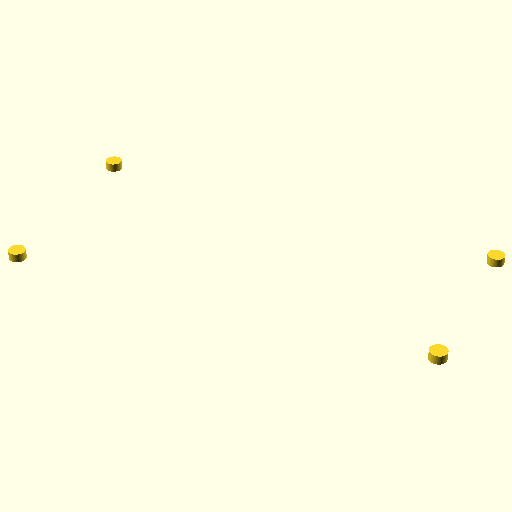

In [6]:
module pillars(ext) {
    boardThick=2;
    boardWidth=107;
    boardDepth=55;
    holeRad=2;
    $fn=100;
    translate([2+holeRad,5+holeRad,-.01]) cylinder(h=boardThick+.1,r=holeRad);
    translate([2+holeRad,boardDepth-2.5-holeRad,-.01]) cylinder(h=boardThick+.1,r=holeRad);
    translate([boardWidth-holeRad-2,boardDepth-holeRad-2,-.01]) cylinder(h=boardThick+.1,r=holeRad);
    translate([boardWidth-holeRad-3,11+holeRad,-.01]) cylinder(h=boardThick+.1,r=holeRad);
}
%display pillars();

## A general rectangular blanking plate (lid)

Compiling design (CSG Products normalization)...
Normalized CSG tree has 5 elements


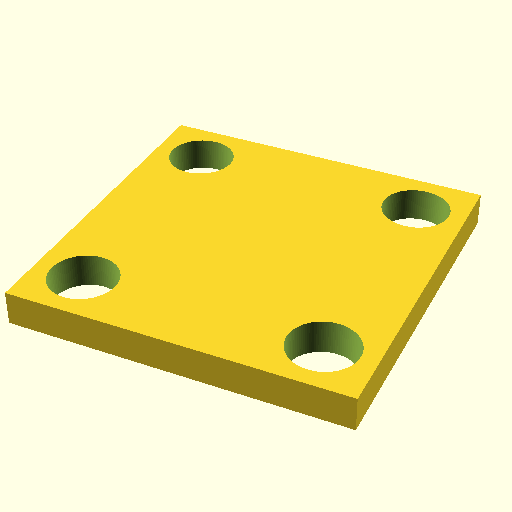

In [7]:
module plate(width,depth,height,inRad,Off) {
    //blanking plate
    plateWidth=width;
    plateDepth=depth;
    plateHeight=height;
    screwHoleRad=inRad;
    screwEdgeOff=Off;
    difference(){
        //plate
        cube([plateWidth,plateDepth,plateHeight]);
        //screwholes
        $fn=100;
        translate([screwEdgeOff,screwEdgeOff,-.5]) cylinder(h=plateHeight+1,r=screwHoleRad);
        translate([plateWidth-screwEdgeOff,screwEdgeOff,-.5]) cylinder(h=plateHeight+1,r=screwHoleRad);
        translate([screwEdgeOff,plateDepth-screwEdgeOff,-.5]) cylinder(h=plateHeight+1,r=screwHoleRad);
        translate([plateWidth-screwEdgeOff,plateDepth-screwEdgeOff,-.5]) cylinder(h=plateHeight+1,r=screwHoleRad);
    }
}
%display plate(20,20,2,2,3);

## A pillar module as used in the following housing

Compiling design (CSG Products normalization)...
Normalized CSG tree has 2 elements


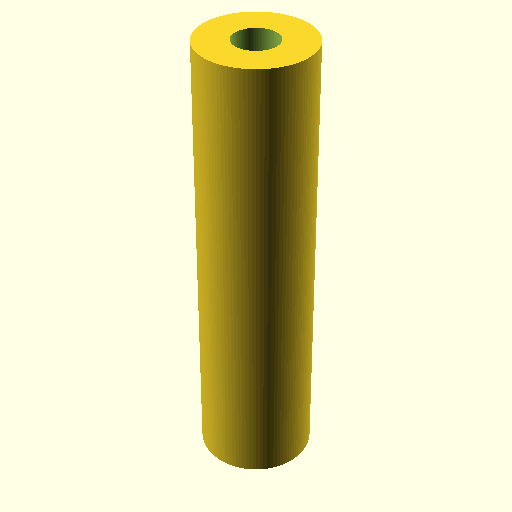

In [8]:
module pillar(height,inRad,outRad) {
    $fn=100;
    difference(){
        cylinder(h=height,r=outRad);
        translate([0,0,-.05]) cylinder(h=height+.1,r=inRad);
        }
}
%display pillar(40,2,5);

## A rectangular housing with mounting pillars for a lid

ECHO: "Dimensions floor plate", 20, 20, 2
ECHO: "Dimensions left wall", 2, 18, 18
ECHO: "Dimensions front wall", 18, 2, 18
ECHO: "Dimensions right wall", 2, 18, 18
ECHO: "Dimensions rear wall", 18, 2, 18
Compiling design (CSG Products normalization)...
Normalized CSG tree has 13 elements


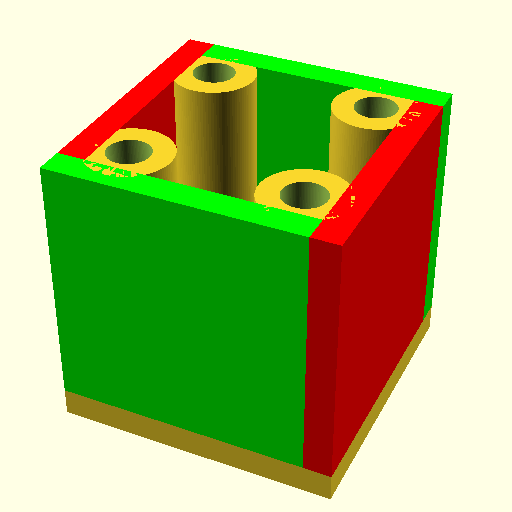

In [9]:
module housing(width,depth,height,wallThick,floorThick,inRad,pillarThick,off) {
    //housing
    boxWidth=width;
    boxDepth=depth;
    boxFloorHeight=floorThick;
    boxWallThick=wallThick;
    boxWallHeight=height;
    screwHoleRad=inRad;
    screwPillarRad=inRad+pillarThick;
    screwEdgeOff=off;
    union(){
        //plate
        cube([boxWidth,boxDepth,boxFloorHeight]);
        echo("Dimensions floor plate",boxWidth,boxDepth,boxFloorHeight);
        translate([screwEdgeOff,screwEdgeOff,0]) pillar(boxWallHeight,screwHoleRad,screwPillarRad);
        translate([boxWidth-screwEdgeOff,screwEdgeOff,0]) pillar(boxWallHeight,screwHoleRad,screwPillarRad);
        translate([screwEdgeOff,boxDepth-screwEdgeOff,0]) pillar(boxWallHeight,screwHoleRad,screwPillarRad);
        translate([boxWidth-screwEdgeOff,boxDepth-screwEdgeOff,0]) pillar(boxWallHeight,screwHoleRad,screwPillarRad);
    }
    color([1,0,0])
    translate([0,boxWallThick,boxFloorHeight]) cube([boxWallThick,boxDepth-boxWallThick,boxWallHeight-boxFloorHeight]);
    echo("Dimensions left wall", boxWallThick,boxDepth-boxWallThick,boxWallHeight-boxFloorHeight);
    color([0,1,0])
    translate([0,0,boxFloorHeight]) cube([boxWidth-boxWallThick,boxWallThick,boxWallHeight-boxFloorHeight]);
    echo("Dimensions front wall", boxWidth-boxWallThick,boxWallThick,boxWallHeight-boxFloorHeight);
    color([1,0,0])
    translate([boxWidth-boxWallThick,0,boxFloorHeight]) cube([boxWallThick,boxDepth-boxWallThick,boxWallHeight-boxFloorHeight]);
    echo("Dimensions right wall", boxWallThick,boxDepth-boxWallThick,boxWallHeight-boxFloorHeight);
    color([0,1,0])
    translate([boxWallThick,boxDepth-boxWallThick,boxFloorHeight]) cube([boxWidth-boxWallThick,boxWallThick,boxWallHeight-boxFloorHeight]);
    echo("Dimensions rear wall", boxWidth-boxWallThick,boxWallThick,boxWallHeight-boxFloorHeight);
}
//width,depth,height,wallThick,floorThick,inRad,pillarThick,off
%display housing(20,20,20,2,2,1.5,1.5,4);

## The initial Draft Housing
This is not how it will be mounted as the board will be mounted ports down and part of the housing open to below.
This is only to easily see if it will fly.

ECHO: "Dimensions floor plate", 122, 61, 2
ECHO: "Dimensions left wall", 2, 59, 23
ECHO: "Dimensions front wall", 120, 2, 23
ECHO: "Dimensions right wall", 2, 59, 23
ECHO: "Dimensions rear wall", 120, 2, 23
Compiling design (CSG Products normalization)...
Normalized CSG tree has 20 elements
Compiling highlights (1 CSG Trees)...


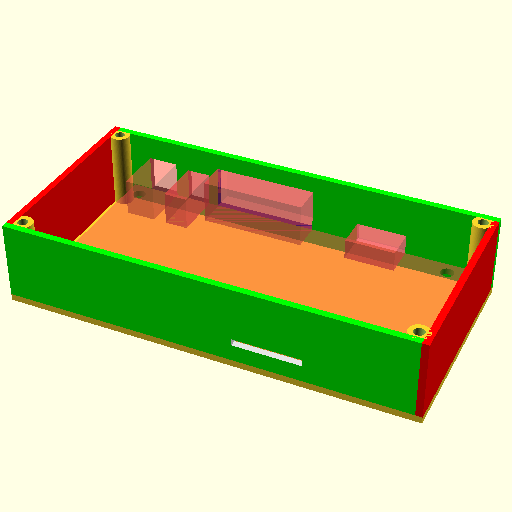

In [10]:

difference() {
    housing(122,61,25,2,2,1.5,1.5,4); //width,depth,height,wallThick,floorThick,inRad,pillarThick,off
    translate([7,3,5]) hdmiBoard(20);
}
#translate([7,4,5]) hdmiBoard(0);
%display 

## Draft Lid

ECHO: "Dimensions floor plate", 122, 61, 2
ECHO: "Dimensions left wall", 2, 59, 23
ECHO: "Dimensions front wall", 120, 2, 23
ECHO: "Dimensions right wall", 2, 59, 23
ECHO: "Dimensions rear wall", 120, 2, 23
Compiling design (CSG Products normalization)...
Normalized CSG tree has 25 elements
Compiling highlights (1 CSG Trees)...


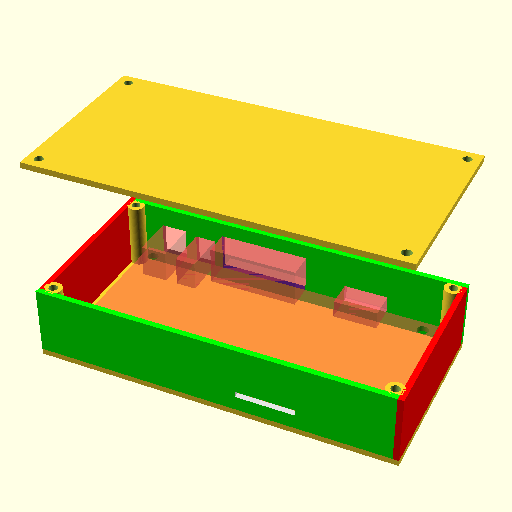

In [11]:

translate([0,0,70]) plate(122,61,2,1.5,4); //width,depth,height,inRad,Off
%display 

In [12]:
%saveAs Boxes-test.stl

File 'Boxes-test.stl' created

In [13]:
%saveAs Boxes-test.scad

File 'Boxes-test.scad' created

In [14]:
%lsmagic

Available Commands: %clear %display %displayCode %%display %%displayCode %mime %command %lsmagic %include %use %saveAs

ECHO: "Dimensions floor plate", 122, 61, 2
ECHO: "Dimensions left wall", 2, 59, 23
ECHO: "Dimensions front wall", 120, 2, 23
ECHO: "Dimensions right wall", 2, 59, 23
ECHO: "Dimensions rear wall", 120, 2, 23
Compiling design (CSG Products normalization)...
Normalized CSG tree has 25 elements
Compiling highlights (1 CSG Trees)...


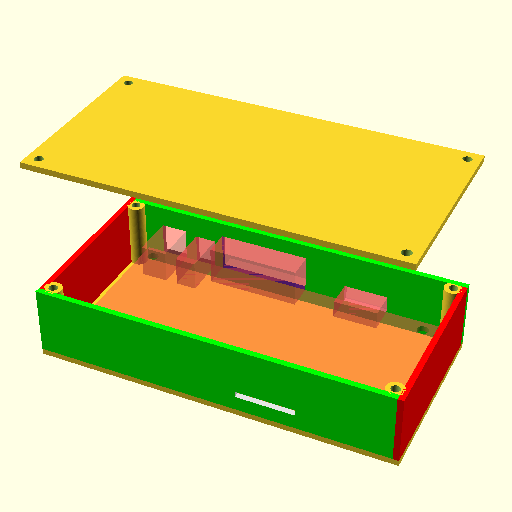

In [15]:
%%display

$vpt = [ 0,0,0 ];
$vpr = [ 140,90,45 ];
$vpd = 20000;

//cube([20,20,20]);


In [16]:
%displayCode

//hdmi display board
module hdmiBoard(ext) {
    boardThick=2;
    boardWidth=107;
    boardDepth=55;
    holeRad=2;
    Extrude=ext; //extrude the ports or set to 0 for real board
    difference(){
        $fn=100;
        union(){
            color([0,.5,0]) cube([boardWidth,boardDepth,boardThick]);
            color([.2,.2,.2]) translate([6,boardDepth-15,boardThick]) cube([9,15+Extrude,11]); //power
            color([.2,.2,.2]) translate([19,boardDepth-15,boardThick]) cube([7,15+Extrude,10]); //audio
            color([0,0,0.6]) translate([29,boardDepth-9,boardThick]) cube([31,15+Extrude,13]); //vga
            color([.9,.9,.9]) translate([74,boardDepth-9.5,boardThick]) cube([15,11+Extrude,6]); //hdmi
            color([.9,.9,.9]) translate([62,0-Extrude,boardThick]) cube([20,7+Extrude,2]); //display cable 30 pin
        }
        translate([2+holeRad,5+holeRad,-.01]) cylinder(h=boardThick+.1,r=holeRad);
        translate([2+holeRad,boardDepth-2.5-holeRad,-.01]) cylinder(h=boardThi

In [17]:
%command

The display command is 'xvfb-run openscad'